<a href="https://colab.research.google.com/github/sindhura-nk/Machine_Learning_1418/blob/main/Agglomerative_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Agglomerative Clustering.
Build a model that performs customer segmentation of mall customers based on Age, Income, and Spending

In [4]:
path = r'https://raw.githubusercontent.com/sindhura-nk/Datasets/refs/heads/main/Mall_Customers.csv'
import pandas as pd
df = pd.read_csv(path)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Perform basic data quality checks

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.isna().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [7]:
df.duplicated().sum()

np.int64(0)

## Separate X

In [8]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [9]:
X = df.drop(columns=['CustomerID'])
X.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## Data Preprocessing and cleaning

In [12]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [10]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [13]:
num_pipe = make_pipeline(SimpleImputer(strategy='mean'),StandardScaler())
# Creating categorical pipeline that handles missing data and scales text data
cat_pipe = make_pipeline(SimpleImputer(strategy='most_frequent'),OneHotEncoder(handle_unknown='ignore',sparse_output=False))
# combining both the pipelines
pre = ColumnTransformer([
    ('cat',cat_pipe,cat),
    ('con',num_pipe,con)
]).set_output(transform='pandas')

# use the pre to fit and transform X data
X_pre = pre.fit_transform(X)

In [14]:
X_pre.head()

,cat__Gender_Female,cat__Gender_Male,con__Age,con__Annual Income (k$),con__Spending Score (1-100)
0,0.0,1.0,-1.424569,-1.738999,-0.434801
1,0.0,1.0,-1.281035,-1.738999,1.195704
2,1.0,0.0,-1.352802,-1.700830,-1.715913
3,1.0,0.0,-1.137502,-1.700830,1.040418
4,1.0,0.0,-0.563369,-1.662660,-0.395980


## Model building

In [15]:
from sklearn.cluster import AgglomerativeClustering

In [16]:
model1 = AgglomerativeClustering(linkage='single')
model1.fit(X_pre)

AgglomerativeClustering(linkage='single')

In [24]:
lb1 = model1.labels_
lb1

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1])

In [20]:
model2 = AgglomerativeClustering(linkage='ward')
model2.fit(X_pre)

AgglomerativeClustering()

In [25]:
lb2 = model2.labels_
lb2

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [22]:
model3 = AgglomerativeClustering(linkage='complete')
model3.fit(X_pre)

AgglomerativeClustering(linkage='complete')

In [26]:
lb3 = model3.labels_
lb3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

##
  Inertia: Intra cluster distance: distance of datapoints within each cluster

  Dunn index: Intracluster(min), Inter cluster distance(max)

 Silhoutee Score: how near is a datapoint in its own cluster, how far it is from the other clusters?

In [27]:
from sklearn.metrics import silhouette_score


In [29]:
s1 = silhouette_score(X_pre,lb1)

In [30]:
s2 = silhouette_score(X_pre,lb2)
s3 = silhouette_score(X_pre,lb3)

In [31]:
s1

np.float64(0.17778848508286405)

In [32]:
s2

np.float64(0.27248218504708843)

In [33]:
s3

np.float64(0.19143684423936244)

In [35]:
n = list(range(2,15))
n

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [37]:
sil_score = []
for i in n:
  model=AgglomerativeClustering(n_clusters=i,linkage='ward')
  model.fit(X_pre)
  lb=model.labels_
  s = silhouette_score(X_pre,lb)
  sil_score.append(s)

In [38]:
sil_score

[np.float64(0.27248218504708843),
 np.float64(0.2855580452726749),
 np.float64(0.2998370042345628),
 np.float64(0.3148237450981173),
 np.float64(0.2897072147078405),
 np.float64(0.2967932236568358),
 np.float64(0.3160060283896421),
 np.float64(0.3371779105224656),
 np.float64(0.35431933965548235),
 np.float64(0.36778209894021946),
 np.float64(0.37676775817629293),
 np.float64(0.3815133038958027),
 np.float64(0.3882010591653304)]

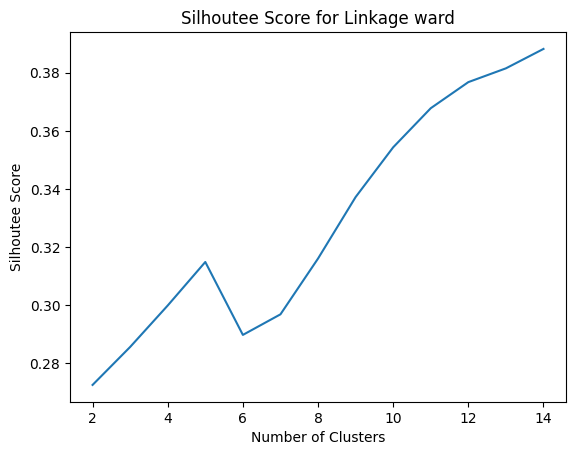

In [40]:
import matplotlib.pyplot as plt
plt.plot(n,sil_score)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhoutee Score')
plt.title('Silhoutee Score for Linkage ward')
plt.show()

In [41]:
## so we can consider k=12 or k=14

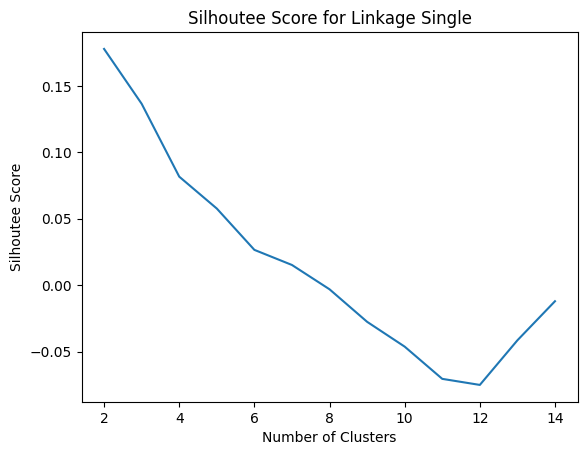

In [42]:
sil_score = []
for i in n:
  model=AgglomerativeClustering(n_clusters=i,linkage='single')
  model.fit(X_pre)
  lb=model.labels_
  s = silhouette_score(X_pre,lb)
  sil_score.append(s)
plt.plot(n,sil_score)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhoutee Score')
plt.title('Silhoutee Score for Linkage Single')
plt.show()

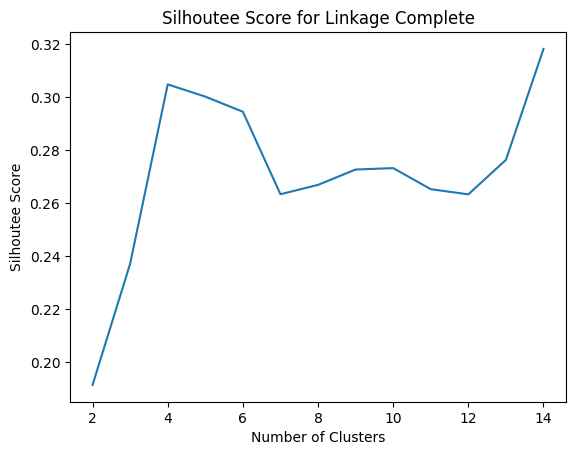

In [43]:
sil_score = []
for i in n:
  model=AgglomerativeClustering(n_clusters=i,linkage='complete')
  model.fit(X_pre)
  lb=model.labels_
  s = silhouette_score(X_pre,lb)
  sil_score.append(s)
plt.plot(n,sil_score)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhoutee Score')
plt.title('Silhoutee Score for Linkage Complete')
plt.show()

In [44]:
## considering linkage as complete, k=4 clusters can give got quality groups

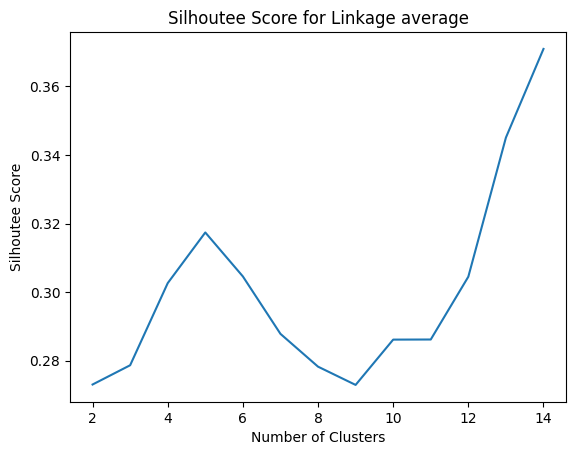

In [45]:
sil_score = []
for i in n:
  model=AgglomerativeClustering(n_clusters=i,linkage='average')
  model.fit(X_pre)
  lb=model.labels_
  s = silhouette_score(X_pre,lb)
  sil_score.append(s)
plt.plot(n,sil_score)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhoutee Score')
plt.title('Silhoutee Score for Linkage average')
plt.show()

In [46]:
# average linkage is suggesting k=5 as best cluster option

In [47]:
final_model = AgglomerativeClustering(n_clusters=5,linkage='average')
final_model.fit(X_pre)

AgglomerativeClustering(linkage='average', n_clusters=5)

In [49]:
lb_final = final_model.labels_
lb_final

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 3, 4, 3,
       2, 3, 4, 3, 3, 3, 4, 3, 3, 4, 4, 4, 4, 4, 3, 4, 4, 3, 4, 4, 4, 3,
       4, 4, 3, 3, 4, 4, 4, 4, 4, 3, 4, 4, 3, 4, 4, 4, 4, 4, 3, 4, 4, 3,
       4, 4, 4, 3, 4, 4, 4, 3, 4, 3, 4, 3, 3, 4, 4, 3, 4, 3, 4, 4, 4, 4,
       4, 3, 4, 3, 3, 3, 4, 4, 4, 4, 3, 4, 4, 1, 3, 1, 0, 1, 0, 1, 0, 1,
       3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [50]:
X.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [51]:
X['Clusters'] = lb_final

In [52]:
X.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,Male,19,15,39,2
1,Male,21,15,81,3
2,Female,20,16,6,2
3,Female,23,16,77,3
4,Female,31,17,40,2


## Dendrogram